https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

# 2 データの準備

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [9]:
test

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
27995       0  ...         0         0         0         0         0   
27996       0  ...         0         0         0         0         0   
27997       0  ...         0         0         0         0         0   
27998       0  ...         0         0         0         0         0   
27999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
27995         0         0         0         0         0  
27996         0         0         0         0         0  
27997         0         0         0         0         0  
27998         0         0         0         0         0  
27999         0         0         0         0         0  

[28000 rows x 784 columns]

C:\Users\iketuba0912\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

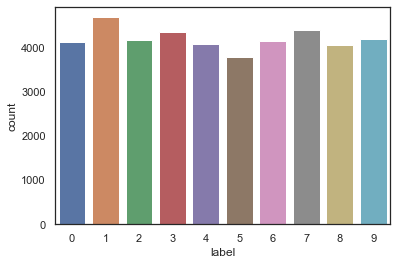

In [5]:
Y_train = train['label']
X_train = train.drop(["label"], axis=1)

del train

g = sns.countplot(Y_train)

Y_train.value_counts()

## 2.2 欠損値の確認

In [7]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

欠損値はないようです。

## 2.3 標準化

In [13]:
X_train = X_train / 255.0
test = test / 255.0

## 2.4 成形

In [15]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [16]:
print(X_train.shape, test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


## 2.5 ワンホットエンコーディング

In [18]:
Y_train = to_categorical(Y_train, num_classes=10)

## 2.6 訓練データと評価データに分ける

In [21]:
random_seed = 2

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_seed)

In [25]:
X_train.shape

(37800, 28, 28, 1)

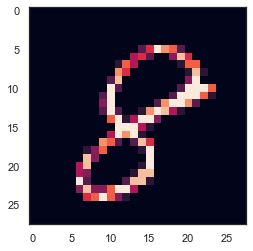

In [27]:
g = plt.imshow(X_train[0, :, :, 0])

# 3. CNN

## 3.1 モデルを定義する

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(optimizer="RMSprop", loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor="val_acc", patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [36]:
epochs = 2
batch_size = 86

## 3.3 データ拡張

In [37]:
# データ拡張しない場合
history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, epochs=epochs, 
                    validation_data=(X_val, Y_val), 
                    verbose=2)

Epoch 1/2
440/440 - 96s - loss: 0.0732 - accuracy: 0.9789 - val_loss: 0.0517 - val_accuracy: 0.9864 - 96s/epoch - 218ms/step
Epoch 2/2
440/440 - 97s - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0366 - val_accuracy: 0.9886 - 97s/epoch - 221ms/step


In [42]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

In [43]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

<ipython-input-43-00f8d670f626>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/2
439/439 - 99s - loss: 0.1289 - accuracy: 0.9611 - val_loss: 0.0507 - val_accuracy: 0.9871 - lr: 0.0010 - 99s/epoch - 225ms/step
Epoch 2/2
439/439 - 102s - loss: 0.0874 - accuracy: 0.9746 - val_loss: 0.0304 - val_accuracy: 0.9910 - lr: 0.0010 - 102s/epoch - 233ms/step


# 4. モデルを評価する

## 4.1 訓練と評価の曲線

In [39]:
print(history.history)

{'loss': [0.07315415143966675, 0.0543309710919857], 'accuracy': [0.9788624048233032, 0.9835978746414185], 'val_loss': [0.05166393145918846, 0.03661553934216499], 'val_accuracy': [0.9864285588264465, 0.9885714054107666]}


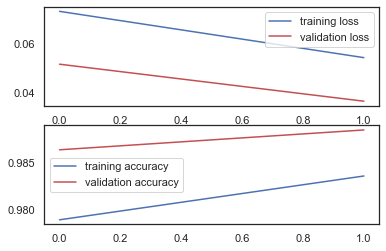

In [41]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='training loss')
ax[0].plot(history.history['val_loss'], color='r', label='validation loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='validation accuracy')
ax[1].legend(loc='best')

## 4.2 混同行列

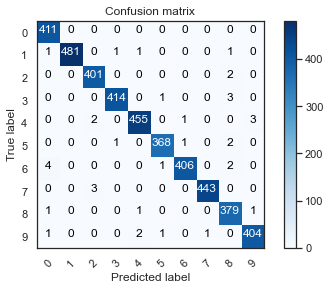

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 評価データに対する予測
Y_pred = model.predict(X_val)
# ワンホットベクトルからスカラーに戻す(予測値)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# ワンホットベクトルからスカラーに戻す(本当の値)
Y_true = np.argmax(Y_val,axis = 1)
# 混同行列を計算する
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# 混同行列をプロットする
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

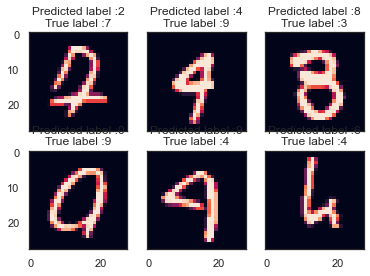

In [50]:
# エラーを表示してみる

# エラーは予測値と本当の値が異なる
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [52]:
results = model.predict(test)
results = np.argmax(results, axis=1)
results = pd.Series(results,name="Label")

In [56]:
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results], axis=1)
submission.to_csv("../output/cnn_mnist_datagen.csv", index=False)